In [3]:
%matplotlib widget

In [4]:
import matplotlib.pyplot as plt
import PIL
from mpl_interactions import ioff, panhandler, zoom_factory
from PIL import Image

In [13]:
image = Image.open("/Users/sherryyang/wigginsLab/data/0814/images/211121_37C_10_1176_HU_timelapse002_prob211203_HU_t00001xy0c1.png")

In [8]:
%matplotlib notebook

In [12]:
%matplotlib widget
plt.ioff()
fig, ax = plt.subplots()
ax.imshow(image)
disconnect_zoom = zoom_factory(ax)
display(fig.canvas)

NameError: name 'image' is not defined

In [16]:
fig.canvas.draw()

In [18]:
fig.canvas

In [3]:
! pip install edt

  Obtaining dependency information for edt from https://files.pythonhosted.org/packages/a8/d0/562f09467409698017b6423077816854dfcb3d573f3523d88b8fca3e0485/edt-2.3.1-cp310-cp310-macosx_10_9_universal2.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 592.5/592.5 kB 7.6 MB/s eta 0:00:00a 0:00:01


In [6]:
import numpy as np
import scipy.io
import matplotlib.pyplot as plt
from segger_tracker import SeggerTracker
import ncolor
import glob

npzFiles = glob.glob("/Users/sherryyang/wigginsLab/data/0814/xy0/phase/*.npy")
for f in npzFiles:
    continue

In [8]:
def find_skeleton_centers(cell_count, gradient_total, threshold, regs_label):
    centers = {}
    for i in range(cell_count+1):
        masked = (regs_label == i) & (gradient_total < threshold)
        if not np.any(masked):
            continue
        #Skeleton of this cell
        y = np.ma.array(gradient_total * masked)
        row_indices, col_indices = np.where(y < 0)
        if(len(row_indices)<1):
            original_field = (regs_label == i)
            row_indices, col_indices = np.ma.where(original_field)
        #Find the geomerty center
        x_center = np.mean(row_indices)
        y_center = np.mean(col_indices)
        #Projected the geomerty center on skeleton
        distances = np.sqrt((row_indices - x_center)**2 + (col_indices - y_center)**2)
        closest_index = np.argmin(distances)
        closest_point = (row_indices[closest_index], col_indices[closest_index])
        #Found skeleton center
        centers[SeggerTracker.compress_xy(closest_point[1], closest_point[0])] = i
        
    return centers

In [11]:
npy_path = "/Users/sherryyang/Documents/wiggins-lab/data/0820/xy0/phase/211121_37C_10_1176_HU_timelapse002_prob211203_HU_t00004xy0c1_seg.npy"
dat = np.load(npy_path, allow_pickle=True).item()
gradientsx = np.gradient(dat['flows'][-1][0])
gradientsy = np.gradient(dat['flows'][-1][1])
gradient_total = gradientsy[1] + gradientsx[0]
regs_label = dat['masks']
cell_num = np.max(regs_label)
centers = find_skeleton_centers(cell_num, gradient_total, -3, regs_label)

In [14]:
import cv2
import numpy as np
image = cv2.imread('/Users/sherryyang/Documents/wiggins-lab/data/0820/xy0/masks/211121_37C_10_1176_HU_timelapse002_prob211203_HU_t00004xy0c1_cp_masks.png', cv2.IMREAD_COLOR)

[ WARN:0@102.999] global grfmt_tiff.cpp:719 readData OpenCV TIFF: TIFFRGBAImageOK: Sorry, can not handle images with 32-bit samples


In [17]:
from PIL import Image
image = Image.open('/Users/sherryyang/Documents/wiggins-lab/data/0820/xy0/masks/211121_37C_10_1176_HU_timelapse002_prob211203_HU_t00004xy0c1_cp_masks.png')

# Convert the image to grayscale
grayscale_image = image.convert('L')

# Convert the grayscale image to a 2D array (matrix)
image_matrix = list(grayscale_image.getdata())
width, height = grayscale_image.size
image_matrix = [image_matrix[i:i+width] for i in range(0, len(image_matrix), width)]


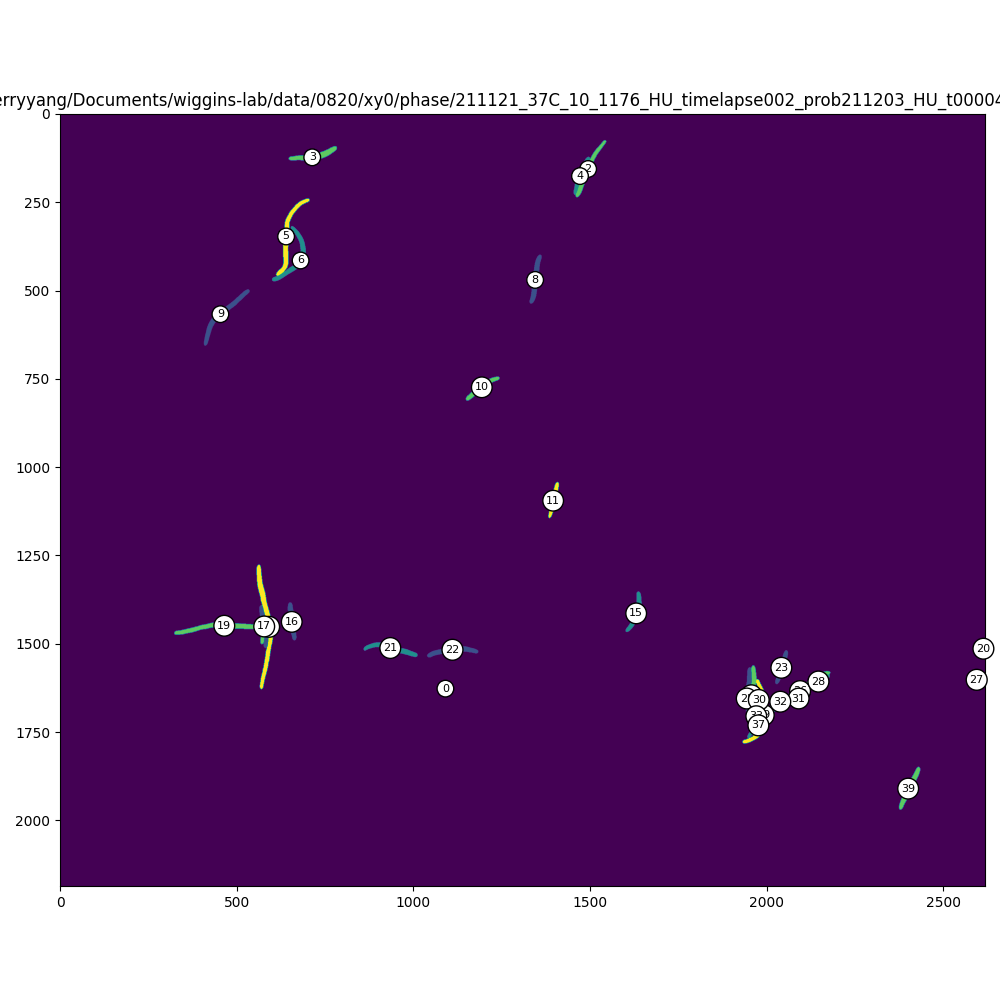

In [12]:
ncolor_masks = ncolor.label(regs_label)
%matplotlib widget

plt.ioff()
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(ncolor_masks)
fig.tight_layout()
plt.title(npy_path)

# Iterate through the dictionary and draw circles with labels
for position, label in centers.items():
    x, y = SeggerTracker.extract_xy(position)
    ax.text(x, y, str(label), color='black', bbox=dict(facecolor='white', edgecolor='black', boxstyle='circle'), fontsize=8, horizontalalignment='center', verticalalignment='center')


disconnect_zoom = zoom_factory(ax)
display(fig.canvas)

In [24]:
matplotlib.pyplot.close()

NameError: name 'matplotlib' is not defined